In [1]:
##### Python
#
import numpy as np
from numpy import linalg as LA
# ensure 'ncon.py' in working dir
from ncon import ncon

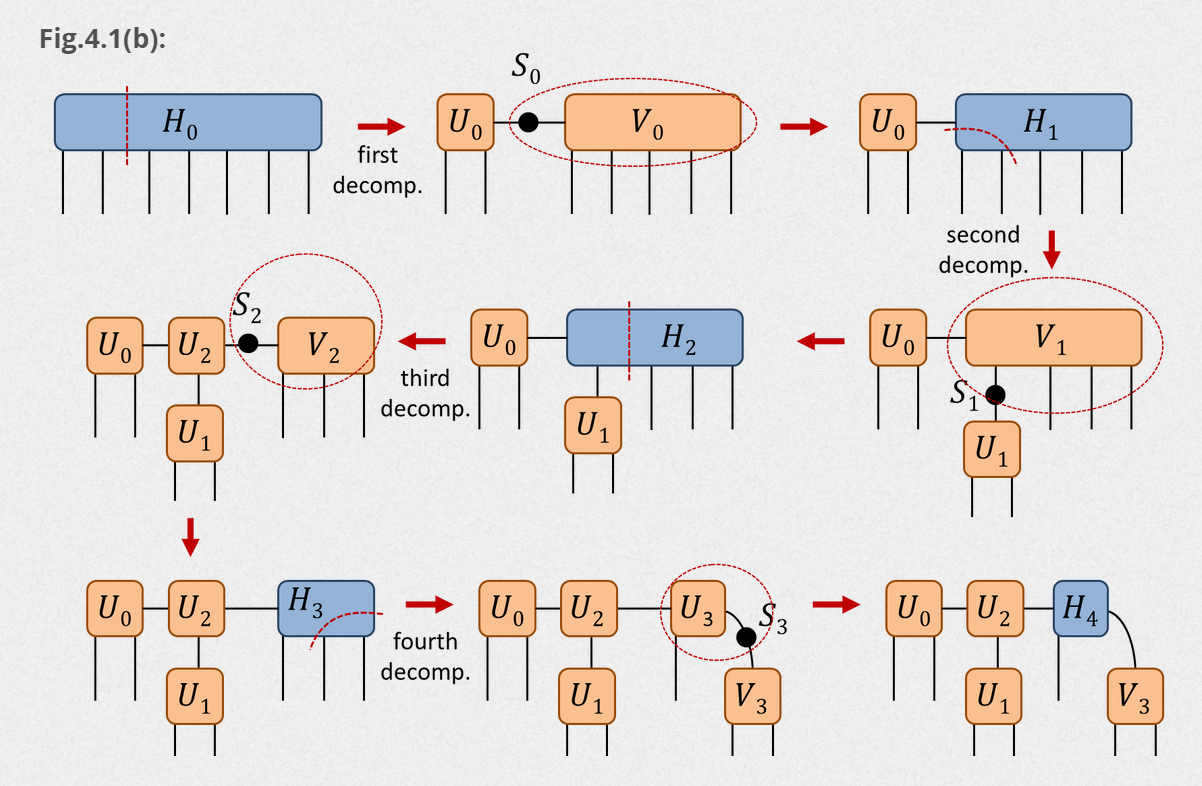

In [2]:
##### Ex4.1(b): multi-stage decomposition
d = 5 # local dimension
chi = 3 # max internal dimension 
H0 = (np.sqrt(1+np.arange(d**7))).reshape(d,d,d,d,d,d,d).transpose(6,5,4,3,2,1,0) 

# first decomposition
utemp,stemp,vhtemp = LA.svd(H0.reshape(d**2,d**5),full_matrices=False)
U0 = (utemp[:,:chi]).reshape(d,d,chi)
H1 = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,d,d,d,d,d)
# second decomposition
utemp,stemp,vhtemp = LA.svd(H1.transpose(1,2,0,3,4,5).reshape(d**2,chi*d**3),full_matrices=False)
U1 = (utemp[:,:chi]).reshape(d,d,chi)
H2 = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,chi,d,d,d).transpose(1,0,2,3,4)
# third decomposition
utemp,stemp,vhtemp = LA.svd(H2.reshape(chi**2,d**3),full_matrices=False)
U2 = (utemp[:,:chi]).reshape(chi,chi,chi)
H3 = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,d,d,d)
# fourth decomposition
utemp,stemp,vhtemp = LA.svd(H3.reshape(chi*d,d**2),full_matrices=False)
V3 = vhtemp[:chi,:].reshape(chi,d,d).transpose(1,2,0)
H4 = (utemp[:,:chi] @ np.diag(stemp[:chi])).reshape(chi,d,chi)
# check result
H0recovered = ncon([U0,U1,U2,V3,H4],[[-1,-2,1],[-3,-4,2],[1,2,3],[-6,-7,4],[3,-5,4]])
totErr = LA.norm(H0 - H0recovered) / LA.norm(H0)
totErr

6.381973359135382e-05

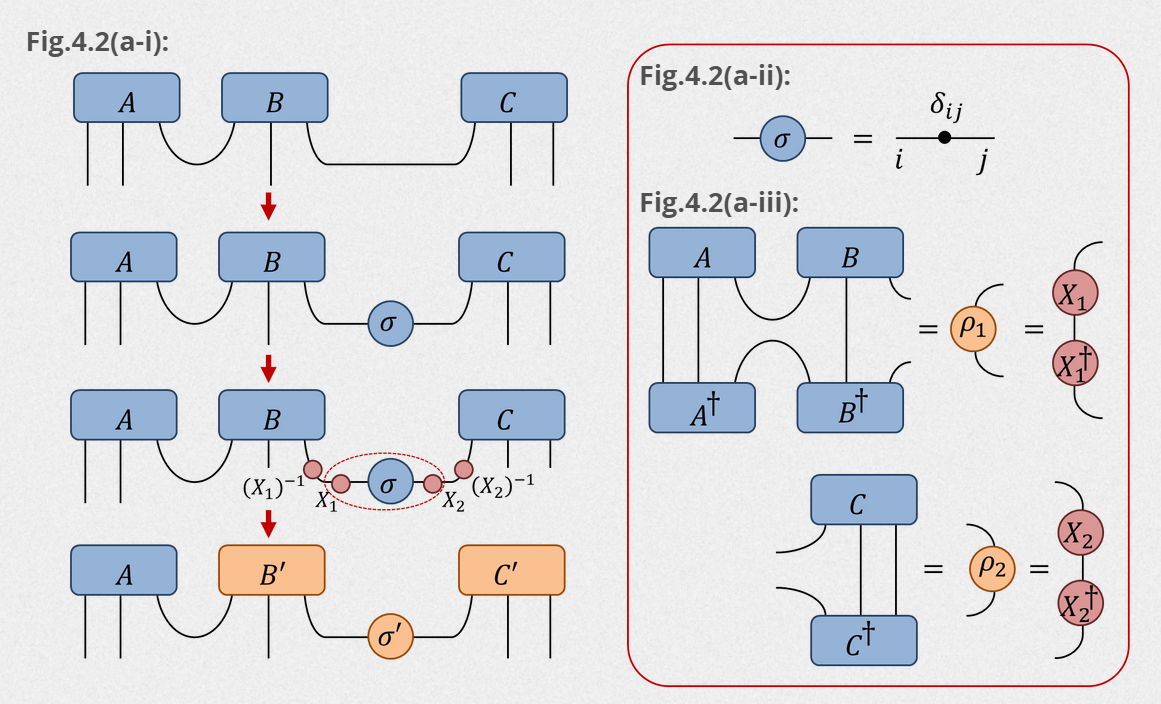

In [3]:
##### Ex4.2(a): set B-C link as center of orthogonality
d = 5 # index dimension
A = np.random.rand(d,d,d)
B = np.random.rand(d,d,d)
C = np.random.rand(d,d,d)
Sig = np.eye(d); # initial link matrix

# generate gauge change matrices
rho1 = ncon([A,A,B,B],[[1,2,3],[1,2,4],[3,5,-1],[4,5,-2]])
rho2 = ncon([C,C],[[-1,1,2],[-2,1,2]])
d1, u1 = LA.eigh(rho1); sq_d1 = np.sqrt(abs(d1))
d2, u2 = LA.eigh(rho2); sq_d2 = np.sqrt(abs(d2))
X1 = u1 @ np.diag(sq_d1) @ u1.T; X1inv = u1 @ np.diag(1/sq_d1) @ u1.T
X2 = u2 @ np.diag(sq_d2) @ u2.T; X2inv = u2 @ np.diag(1/sq_d2) @ u2.T
# implement gauge change
Bprime = ncon([B,X1inv],[[-1,-2,1],[1,-3]])
Cprime = ncon([X2inv,C],[[-1,1],[1,-2,-3]])
Sig_prime = X1 @ Sig @ X2
# check result
H0 = ncon([A,B,C],[[-1,-2,1],[1,-3,2],[2,-4,-5]])
H1 = ncon([A,Bprime,Sig_prime,Cprime],[[-1,-2,1],[1,-3,2],[2,3],[3,-4,-5]])
totErr = LA.norm(H0 - H1) / LA.norm(H0) 
totErr

1.0134964501876028e-15

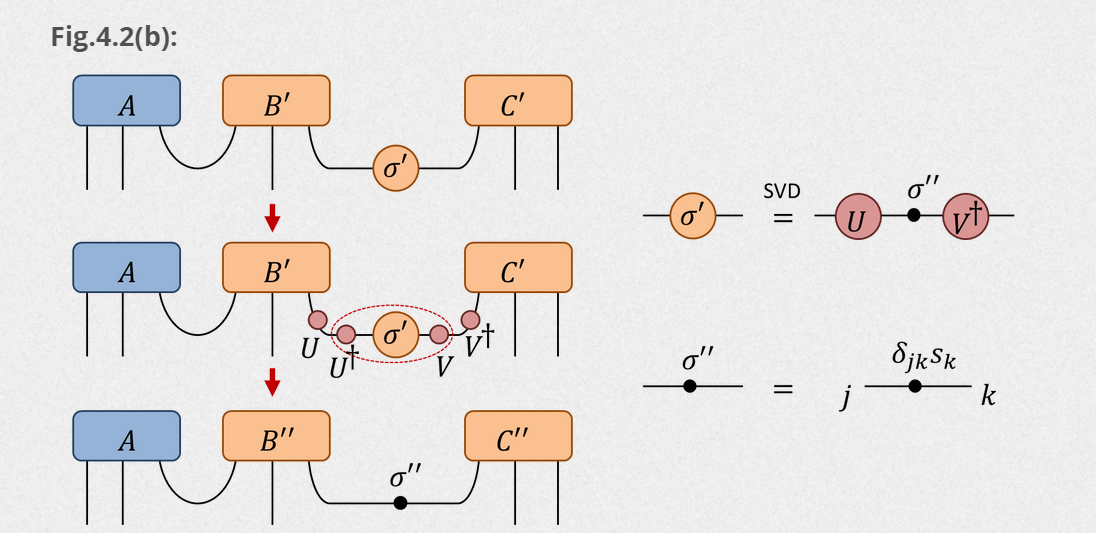

In [4]:
##### Ex4.2(b): setting a link as a center of orthogonality
##### (continues from Ex4.2(a))

# perform unitary gauge change to diagonalize link matrix
utemp, Sig_pp, vhtemp = LA.svd(Sig_prime,full_matrices=False)
Bpp = ncon([Bprime,utemp],[[-1,-2,1],[1,-3]])
Cpp = ncon([Cprime,vhtemp],[[1,-2,-3],[-1,1]])
# check result
H2 = ncon([A,Bpp,np.diag(Sig_pp),Cpp],[[-1,-2,1],[1,-3,2],[2,3],[3,-4,-5]])
totErr = LA.norm(H0 - H2) / LA.norm(H0) 
totErr

1.4211121692799027e-15

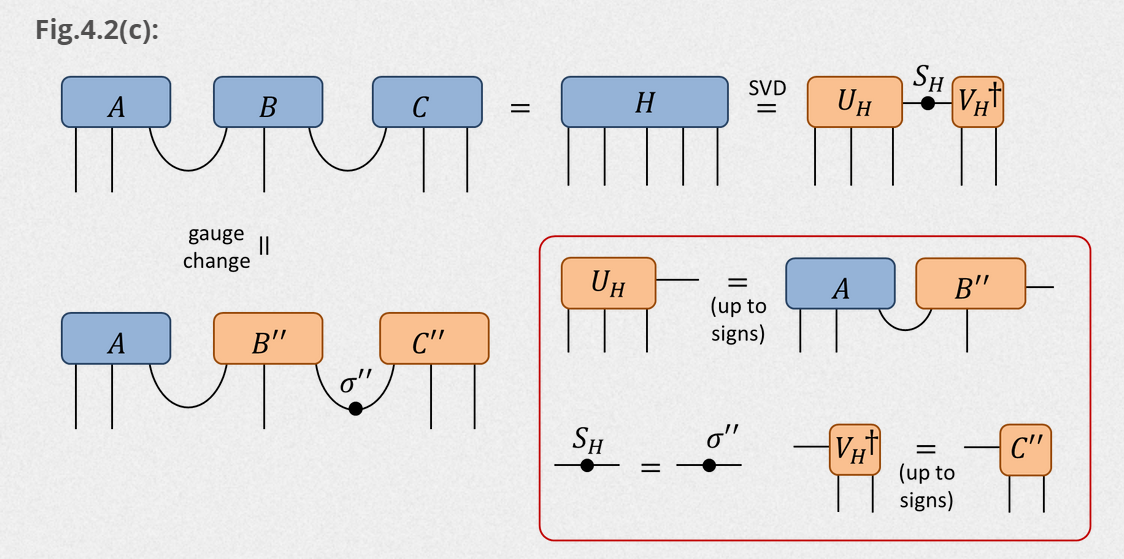

In [5]:
##### Ex4.2(c): equivalence of center of orthogonality and SVD
##### (continues from Ex4.2(b))
H = ncon([A,B,C],[[-1,-2,1],[1,-3,2],[2,-4,-5]])
utemp,stemp,vhtemp = LA.svd(H.reshape(d**3,d**2),full_matrices=False)
UH = utemp[:,:d].reshape(d,d,d,d)
SH = stemp[:d]
VH = vhtemp[:d,:].reshape(d,d,d)

# compare with previous tensors from orthonormal form 
ErrU = LA.norm(abs(UH) - abs(ncon([A,Bpp],[[-1,-2,1],[1,-3,-4]])))
ErrS = LA.norm(SH - Sig_pp) 
ErrV = LA.norm(abs(VH) - abs(Cpp))
# all three results should be vanishingly small!!!
print(ErrU,ErrS,ErrV)

3.825700273358665e-14 1.7697331119214253e-13 3.20201641346023e-14


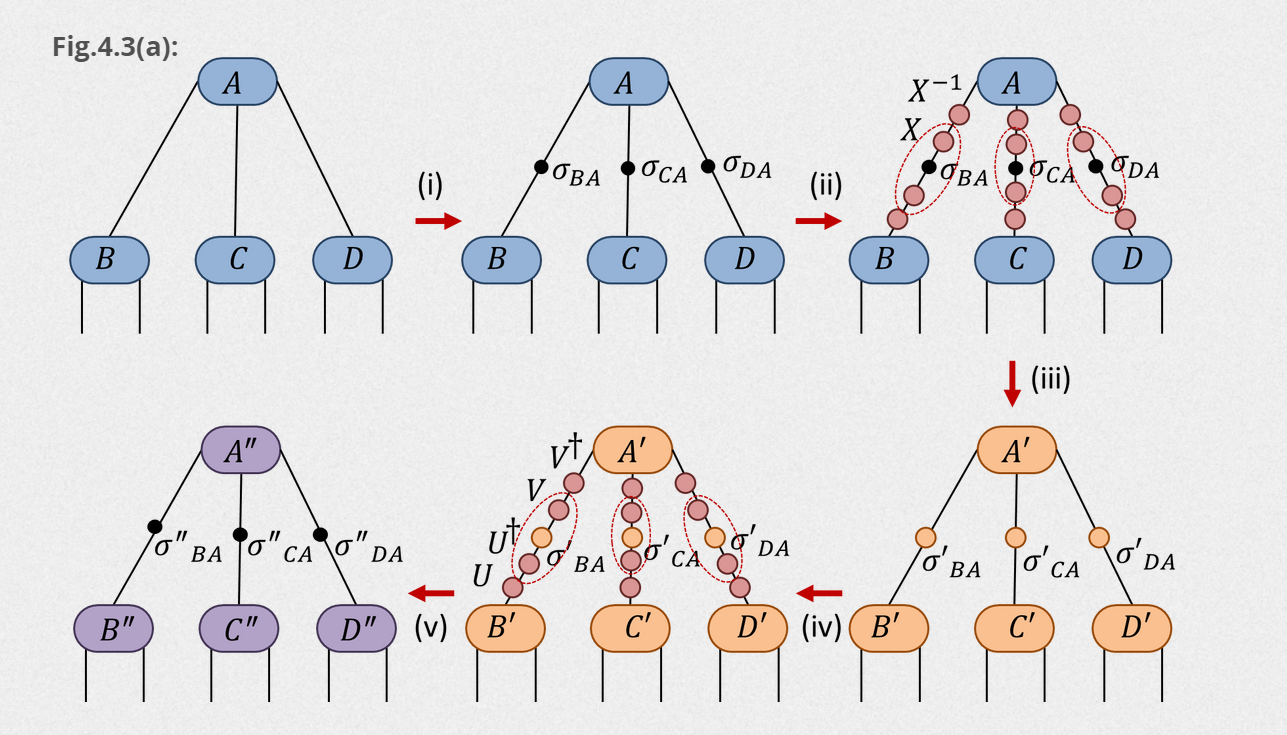

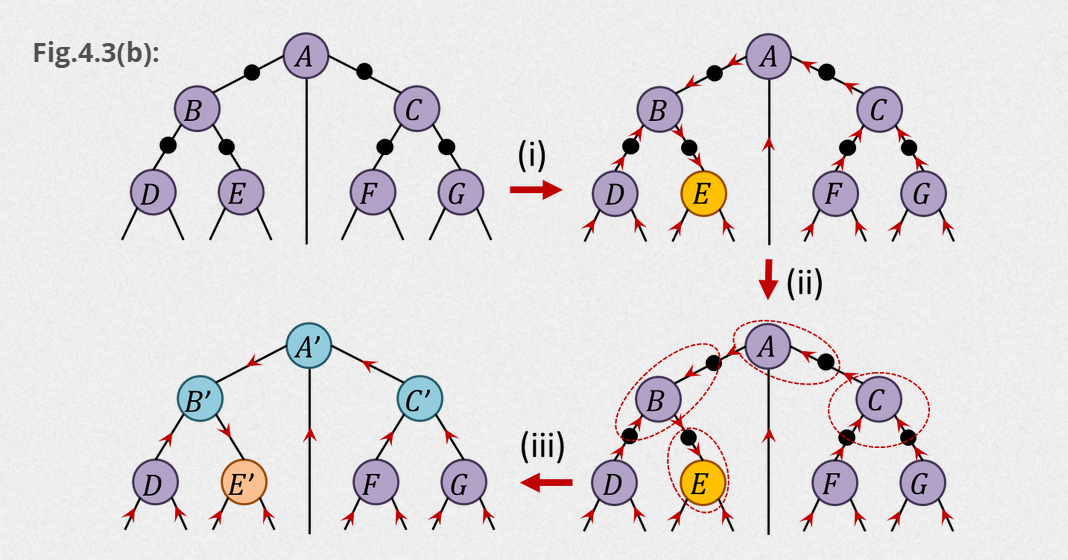

# Problem Set

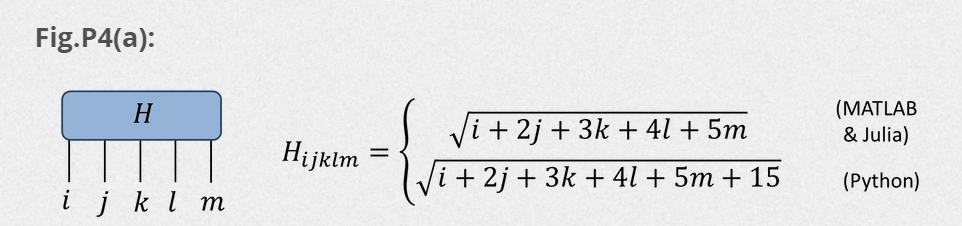

d = 6

In [6]:
d = 6
H = np.zeros((d,d,d,d,d))
for i in range(d):
    for j in range(d):
        for k in range(d):
            for l in range(d):
                for m in range(d):
                    H[i,j,k,l,m] = np.sqrt(i+2*j+3*k+4*l+5*m+15)

In [7]:
LA.norm(H)

638.9366165747585

In [8]:
H1 = H/LA.norm(H)

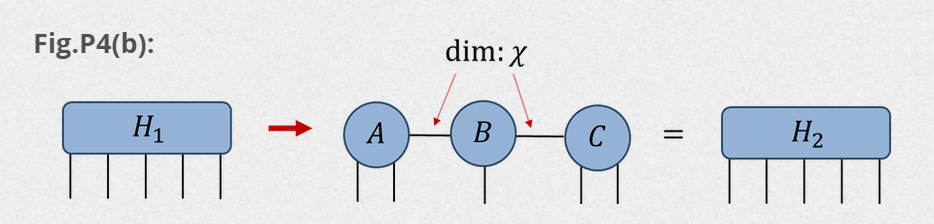

chi = 4

In [40]:
chi = 4

In [41]:
Ubuf, Sbuf, Vbuf = LA.svd(H1.reshape((d*d,d*d*d)),full_matrices=False)

In [42]:
A = Ubuf[:,:chi].reshape((d,d,chi))
Hp = (np.diag(Sbuf[:chi])@Vbuf[:chi,:]).reshape((chi,d,d,d))
A.shape

(6, 6, 4)

In [43]:
Hp.shape

(4, 6, 6, 6)

In [45]:
Ubuf, Sbuf, Vbuf = LA.svd(Hp.reshape((chi*d,d*d)),full_matrices=False)

In [46]:
B = Ubuf[:,:chi].reshape((chi,d,chi))
C = (np.diag(Sbuf[:chi])@Vbuf[:chi,:]).reshape((chi,d,d))

In [47]:
H2 = ncon([A,B,C],[[-1,-2,1],[1,-3,2],[2,-4,-5]])

In [48]:
eps = LA.norm(H1-H2)
eps

1.3381420236233581e-07

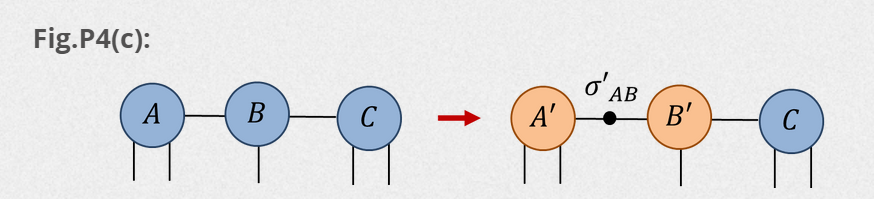

In [49]:
rho1 = ncon([A,A],[[1,2,-1],[1,2,-2]])
rho2 = ncon([B,C,B,C],[[-1,1,2],[2,3,4],[-2,1,5],[5,3,4]])
d1, u1 = LA.eigh(rho1); sq_d1 = np.sqrt(abs(d1))
X1 = u1 @ np.diag(sq_d1) @ u1.T; X1inv = u1 @ np.diag(1/sq_d1) @ u1.T
d2, u2 = LA.eigh(rho2); sq_d2 = np.sqrt(abs(d2))
X2 = u2 @ np.diag(sq_d2) @ u2.T; X2inv = u2 @ np.diag(1/sq_d2) @ u2.T
print(X1.shape,X2.shape)

(4, 4) (4, 4)


In [50]:
Ap = ncon([A,X1inv],[[-1,-2,1],[1,-3]])
Bp = ncon([B,X2inv],[[1,-2,-3],[-1,1]])
s = np.eye(chi)
Sp = ncon([X1,s,X2],[[-1,1],[1,2],[2,-2]])


In [51]:
U, S, V = LA.svd(Sp)
Uinv = LA.inv(U); Vinv = LA.inv(V)
S

array([9.99958526e-01, 9.10710202e-03, 7.97571621e-05, 1.61299333e-06])

In [52]:
App = ncon([Ap,U],[[-1,-2,1],[1,-3]])
Bpp = ncon([V,Bp],[[-1,1],[1,-2,-3]])
Spp = Uinv@Sp@Vinv

In [53]:
np.round(Spp)

array([[ 1.,  0., -0., -0.],
       [ 0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.]])

In [54]:
_,s,_ = LA.svd(H2.reshape((d*d,d*d*d)),full_matrices=False)
np.round(s)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

# Solution

In [55]:
##### Problem set 4 solutions:
import numpy as np
from numpy import linalg as LA
# ensure 'ncon.py' in working dir
from ncon import ncon

# (a) define tensor and normalize
d = 6
H = np.zeros((d,d,d,d,d))
for ni in range(d):
    for nj in range(d):
        for nk in range(d):
            for nl in range(d):
                for nm in range(d):
                    H[ni,nj,nk,nl,nm] = np.sqrt(ni+2*nj+3*nk+4*nl+5*nm+15)
 
nmH = LA.norm(H)
H1 = H/nmH

# (b) multi-stage decomposition
chi = 4
utemp,stemp,vhtemp = LA.svd(H1.reshape(d**2,d**3),full_matrices=False)
A = utemp[:,:chi].reshape(d,d,chi)
Htemp = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,d,d,d)
utemp,stemp,vhtemp = LA.svd(Htemp.reshape(chi*d,d**2),full_matrices=False)
B = utemp[:,:chi].reshape(chi,d,chi)
C = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,d,d)
# check accuracy
H2 = ncon([A,B,C],[[-1,-2,1],[1,-3,2],[2,-4,-5]])
TrErr = LA.norm(H1-H2)

# (c) center of orthogonality at a link
# compute gauge change between A-B tensors
SigAB = np.eye(chi)
rhoL = ncon([A,A],[[1,2,-1],[1,2,-2]])
rhoR = ncon([B,B,C,C],[[-1,1,2],[-2,1,3],[2,4,5],[3,4,5]])
dL, uL = LA.eigh(rhoL); sq_dL = np.sqrt(abs(dL))
dR, uR = LA.eigh(rhoR); sq_dR = np.sqrt(abs(dR))
XL = uL @ np.diag(sq_dL) @ uL.T; XLinv = uL @ np.diag(1/sq_dL) @ uL.T
XR = uR @ np.diag(sq_dR) @ uR.T; XRinv = uR @ np.diag(1/sq_dR) @ uR.T
utemp,SigABp,vhtemp = LA.svd(XL @ SigAB @ XR)
Ap = ncon([A,XLinv*utemp],[[-1,-2,1],[1,-3]])
Bp = ncon([B,vhtemp*XRinv],[[1,-2,-3],[-1,1]])

# difference in singular values between SVD:
_,svalues,_ = LA.svd(H2.reshape(d**2,d**3),full_matrices=False)
Serr = LA.norm(svalues[:chi] - SigABp)